## Análisis Método Jacobi vs Método Gauss-Seidel


### Descripción del Método Jacobi

El método Jacobi es un método iterativo que sirve para solucionar sistemas lineales de la forma $Ax = b$, dado un vector inicial $v_0$, este método realiza una transformación de la fila $E_i$ a un despeje de la variable $x_{i}$, es decir, 

$$x_i = -\frac{1}{a_i} \sum_{j = 1, j \neq i}^{n-1} (a_{ij}x_j) + b_i$$

Así para cada $k \geq 1$, se genera los componentes $x^{(k)}_i$, de $X^{(k)}$ a partir de los componentes $X^{k-1}$ por medio de

$$x^{(k)}_i = -\frac{1}{a_i} \sum_{j = 1, j \neq i}^{n-1} (a_{ij}x^{(k-1)}_j) + b_i$$

para $i=1,2,3,4\dots ,n$.

### Construcción del Método Jacobi

El código mostrado abajo realizan el Método Jacobi, donde:

- La primera función realiza la transformación del sistema lineal $Ax = b$ a un sistema donde las filas corresponden al despeje de la variable $x_i$ que lo denotamos $x = Ty + c$.
- La segunda función toma la transformación del sistema lineal a solucionar, un vector inicial, la tolerancia de error, el número de iteraciones y la norma con la cual queremos calcular el error; Para calcular las iteraciones en el método Jacobi y al final retorna una tabla con las aproximaciones y una tabla de errores de cada iteración. 

In [1]:
# Librerias a usar
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Transforma el sistema Ax = b al sistema Tx = c
def transformar_sistema(A, b):
    if A[0, 0] == 0:
        return print("No es posible realizar la transformación")

    # Inicializar la matriz de transformación T
    T = np.zeros_like(A, dtype=float)

    # Iterar sobre las filas de la matriz A
    for i in range(len(A)):
        # Seleccionar la fila actual y los elementos de la diagonal
        fila_actual = A[i]
        diag_element = fila_actual[i]

        # Despejar xi de la ecuación correspondiente
        for j in range(len(fila_actual)):
            if j != i:
                T[i][j] = -fila_actual[j] / diag_element

        T[i][i] = 0

    c = b / np.diag(A)
    return T, c

In [15]:
# Definición de la función para el método Jacobi

def met_jacobi(T, c, v_0, tol, n_iteration, norm):
    norm_vk = 0
    norm_v0_vk = 0
    error = []
    table_vk = np.array([v_0])
    for i in range(0, n_iteration):
        # Matriz por vector para hallar el vector k-ésimo

        v_k = np.round(np.dot(T, v_0) + c, 4)

        # Calculo de la norma
        if norm == 1:
            norm_v0_vk = np.linalg.norm(v_k - v_0, np.inf)
            norm_vk = np.linalg.norm(v_k, np.inf)
        elif norm == 2:
            norm_v0_vk = np.linalg.norm(v_k - v_0)
            norm_vk = np.linalg.norm(v_k)

        # Calculo del error relativo
        error.append(norm_v0_vk / norm_vk)
        v_0 = v_k
        table_vk = np.append(table_vk, [v_k])
        if error[i] <= tol:
            return table_vk.reshape(i + 2, len(T)).transpose(), np.array(error)

    return table_vk.reshape(n_iteration + 1, len(T)).transpose(), np.array(error)

In [16]:
# Ejemplo: Definición del sistema lineal a resolver y el vector inicial v_0

Ax_b = np.array([[10, -1, 2, 0, 6],
                 [-1, 11, -1, 3, 25],
                 [2, -1, 10, -1, -11],
                 [0, 3, -1, 8, 15]])
v_0 = np.array([0, 0, 0, 0])

print(f'El sistema Ax = b esta representado por A:\n{Ax_b[:, :-1]}\nb: {Ax_b[:, -1]}\nEl vector inicial es v_0:{v_0}')

El sistema Ax = b esta representado por A:
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
b: [  6  25 -11  15]
El vector inicial es v_0:[0 0 0 0]


In [17]:
# Sacamos su transformación x = Ty + c
T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])
print(f'El sistema x = Ty + c esta representado por T:\n{T}\nc: {c}')

El sistema x = Ty + c esta representado por T:
[[ 0.          0.1        -0.2         0.        ]
 [ 0.09090909  0.          0.09090909 -0.27272727]
 [-0.2         0.1         0.          0.1       ]
 [ 0.         -0.375       0.125       0.        ]]
c: [ 0.6         2.27272727 -1.1         1.875     ]


In [25]:
# Ejecutamos el método Jacobi usando la norma uniforme y la norma euclidiana obteniendo
table_vk, error1_jac = met_jacobi(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=1)
table_vk, error2_jac = met_jacobi(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=2)
table_vk

array([[ 0.    ,  0.6   ,  1.0473,  0.9326,  1.0152,  0.989 ,  1.0032,
         0.9981,  1.0006,  0.9997,  1.0001],
       [ 0.    ,  2.2727,  1.7159,  2.0533,  1.9537,  2.0114,  1.9922,
         2.0023,  1.9987,  2.0004,  1.9998],
       [ 0.    , -1.1   , -0.8052, -1.0494, -0.9681, -1.0103, -0.9945,
        -1.002 , -0.999 , -1.0004, -0.9998],
       [ 0.    ,  1.875 ,  0.8852,  1.1309,  0.9738,  1.0214,  0.9944,
         1.0036,  0.9989,  1.0006,  0.9998]])

In [26]:
error1_jac

array([1.00000000e+00, 5.76840142e-01, 1.64320849e-01, 8.04115268e-02,
       2.86864870e-02, 1.35528561e-02, 5.04419917e-03, 2.35152849e-03,
       8.49830034e-04])

In [27]:
error2_jac

array([1.00000000e+00, 5.36736092e-01, 1.81887572e-01, 8.44623379e-02,
       3.37267193e-02, 1.49253401e-02, 6.19069370e-03, 2.68218891e-03,
       1.10494579e-03, 4.66032499e-04])

### Descripción del Método Gauss-Seidel

El método Gauss-Seidel es un método iterativo que sirve para solucionar sistemas lineales de la forma $Ax = b$, dado un vector inicial $v_0$, este método realiza una transformación de la fila $E_i$ a un despeje de la variable $x_{i}$, es decir, 

$$x_i = -\frac{1}{a_i} \sum_{j = 1, j \neq i}^{n-1} (a_{ij}x_j) + b_i$$

Dado que para $i \geq 1$ los valores del componente $x^{(k)}_1, \dots, x^{(k)}_{i-1}$ ya se han calculado, luego podemos usar esas aproximaciones para calcular los componentes siguientes, es decir, calculamos:

$$x^{(k)}_i = -\frac{1}{a_i} \sum_{j = 1}^{i-1} (a_{ij}x^{(k)}_j) + \sum_{j = i + 1}^{n} (a_{ij}x^{(k-1)}_j) + b_i$$

para $i=1,2,3,4\dots ,n$.

### Construcción del Método Gauss-Seidel

El código mostrado abajo realizan el método Gauss-Seidel, donde:

- La primera función realiza la transformación del sistema lineal $Ax = b$ a un sistema donde las filas corresponden al despeje de la variable $x_i$ que lo denotamos $x = Ty + c$.
- La segunda función toma la transformación del sistema lineal a solucionar, un vector inicial, la tolerancia de error, el número de iteraciones y la norma con la cual queremos calcular el error; Para calcular las iteraciones en el método Gauss-Seidel y al final retorna una tabla con las aproximaciones y una tabla de errores de cada iteración. 

In [32]:
def metodo_gauss(T, c, v_0, tol, n_iteration, norm):
    norm_xk = 0
    norm_xk_v0 = 0
    error = []
    table_xk = np.array([v_0])

    for n in range(n_iteration):

        xk = np.zeros_like(c, dtype=float)
        # Calculo del vector x_k
        for i in range(len(T)):

            if i == 0:
                xk[i] = np.round(np.dot(T[i, :], v_0) + c[i], 4)
            elif i == len(T) - 1:
                xk[i] = np.round(np.dot(T[i, :], xk), 4) + np.round(c[i], 4)
            else:
                xk[i] = np.round(np.round(np.dot(T[i, :i], xk[:i]), 4) + np.round(np.dot(T[i, i + 1:], v_0[i + 1:]),
                                                                                  4) + np.round(c[i], 4), 4)

        if norm == 1:
            norm_xk_v0 = np.linalg.norm(xk - v_0, np.inf)
            norm_xk = np.linalg.norm(xk, np.inf)
        if norm == 2:
            norm_xk_v0 = np.linalg.norm(xk - v_0)
            norm_xk = np.linalg.norm(xk)

        error.append(norm_xk_v0 / norm_xk)

        table_xk = np.append(table_xk, [xk])

        v_0 = xk

        if error[n] < tol:
            return table_xk.reshape(n + 2, len(T)).transpose(), np.array(error)

    return table_xk.reshape(n_iteration + 1, len(T)).transpose(), np.array(error)

In [29]:
# Realizamos el ejemplo anterior usando Gauss-Seidel, definición del sistema lineal a resolver y el vector inicial v_0

Ax_b = np.array([[10, -1, 2, 0, 6],
                 [-1, 11, -1, 3, 25],
                 [2, -1, 10, -1, -11],
                 [0, 3, -1, 8, 15]])
v_0 = np.array([0, 0, 0, 0])
print(f'El sistema Ax = b esta representado por A:\n{Ax_b[:, :-1]}\nb: {Ax_b[:, -1]}\nEl vector inicial es v_0:{v_0}')

El sistema Ax = b esta representado por A:
[[10 -1  2  0]
 [-1 11 -1  3]
 [ 2 -1 10 -1]
 [ 0  3 -1  8]]
b: [  6  25 -11  15]
El vector inicial es v_0:[0 0 0 0]


In [30]:
# Sacamos su transformación x = Ty + c
T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])
print(f'La transformación x=Ty+c es definida por T:\n{T}\nEl vector c:\n{c}')

La transformación x=Ty+c es definida por T:
[[ 0.          0.1        -0.2         0.        ]
 [ 0.09090909  0.          0.09090909 -0.27272727]
 [-0.2         0.1         0.          0.1       ]
 [ 0.         -0.375       0.125       0.        ]]
El vector c:
[ 0.6         2.27272727 -1.1         1.875     ]


In [33]:
table_xk1, error1_gauss = metodo_gauss(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=1)
table_xk1, error2_gauss = metodo_gauss(T, c, v_0, tol=10 ** (-3), n_iteration=10, norm=2)
table_xk1

array([[ 0.    ,  0.6   ,  1.0302,  1.0066,  1.0009,  1.0001],
       [ 0.    ,  2.3272,  2.0369,  2.0035,  2.0003,  2.    ],
       [ 0.    , -0.9873, -1.0144, -1.0026, -1.0003, -1.    ],
       [ 0.    ,  0.8789,  0.9844,  0.9984,  0.9998,  1.    ]])

In [34]:
error1_gauss

array([1.00000000e+00, 2.11203299e-01, 1.66708261e-02, 2.84957256e-03,
       4.00000000e-04])

In [35]:
error2_gauss

array([1.00000000e+00, 1.97514430e-01, 1.69005538e-02, 2.67146710e-03,
       3.50504825e-04])

### Análisis de Convergencia

In [39]:
def gen_Ax_b(m, n, low, high):
    Ax_b = np.array([[np.random.uniform(low, high) for j in range(n)] for i in range(m)])
    return Ax_b

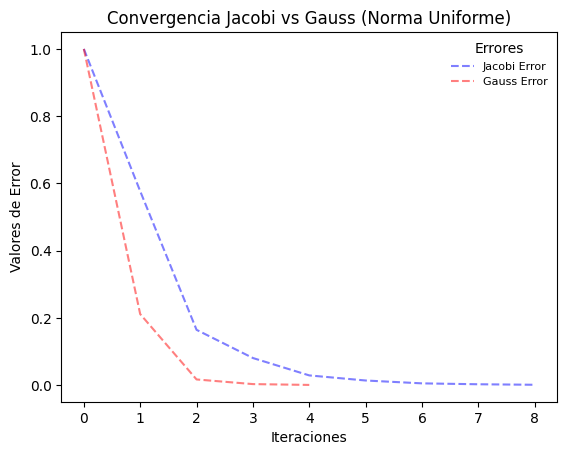

In [36]:
plt.plot(error1_jac, '--', label='Jacobi Error', alpha=0.5, color='blue')
plt.plot(error1_gauss, '--', label='Gauss Error', alpha=0.5, color='red')

plt.title('Convergencia Jacobi vs Gauss (Norma Uniforme)')
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Error')
plt.legend(frameon=False, title='Errores', fontsize=8)

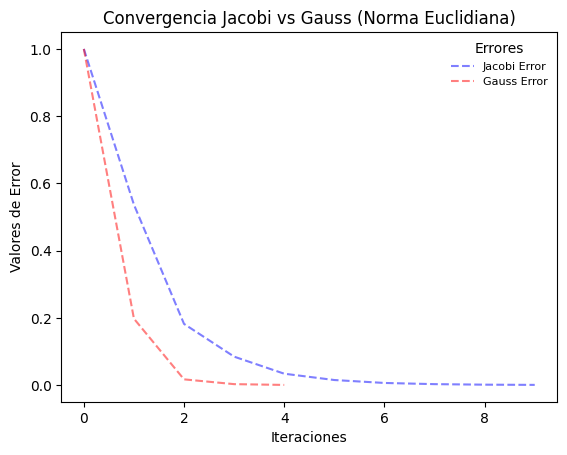

In [37]:
plt.plot(error2_jac, '--', label='Jacobi Error', alpha=0.5, color='blue')
plt.plot(error2_gauss, '--', label='Gauss Error', alpha=0.5, color='red')

plt.title('Convergencia Jacobi vs Gauss (Norma Euclidiana)')
plt.xlabel('Iteraciones')
plt.ylabel('Valores de Error')
plt.legend(frameon=False, title='Errores', fontsize=8)

In [58]:
mean_errors1_jac = []
mean_errors1_gauss = []
v_0 = np.array([0, 0, 0, 0])

for i in range(20):
    Ax_b = gen_Ax_b(m=4, n=5, low=0, high=1)

    T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])

    table_vk, error1_jac = met_jacobi(T, c, v_0, tol=10 ** (-i), n_iteration=20, norm=1)
    table_xk, error1_gauss = metodo_gauss(T, c, v_0, tol=10 ** (-i), n_iteration=20, norm=1)

    mean_errors1_jac.append(np.mean(error1_jac))
    mean_errors1_gauss.append(np.mean(error1_gauss))

print(f'Media de los errores usando Jacobi con norma uniforme:\n {mean_errors1_jac}')
print(f'Media de los errores usando Gauss-Seidel con norma uniforme:\n {mean_errors1_gauss}')

Media de los errores usando Jacobi con norma uniforme:
 [1.0, 1.3297600766965618, 1.1660198745108235, 1.1823023106811132, 1.1970925119234581, 1.396656322278354, 1.4302709796243342, 1.74831933899194, 1.1843508342791826, 1.209266194453449, 1.0447357179088332, 1.4520407716198713, 1.4168042417627, 1.2484434040350905, 1.1762028410121934, 1.1391227919837552, 1.2955501852977953, 1.2057735657671287, 1.2759260995316493, 1.3372543405952704]
Media de los errores usando Gauss-Seidel con norma uniforme:
 [0.8985694906893575, 0.5613336086029894, 0.9125649569761141, 0.966257253281085, 1.131518452309883, 0.31368741912178655, 0.5819865521148324, 0.1270588417956192, 0.865238744238054, 1.1434200480703445, 1.0088940373967745, 0.14387763540672427, 0.181929275167338, 0.663636158587062, 0.9602081582451113, 0.9310225075377836, 0.09174181846956841, 0.8605859044143294, 0.7173390121184655, 0.5330387384255005]


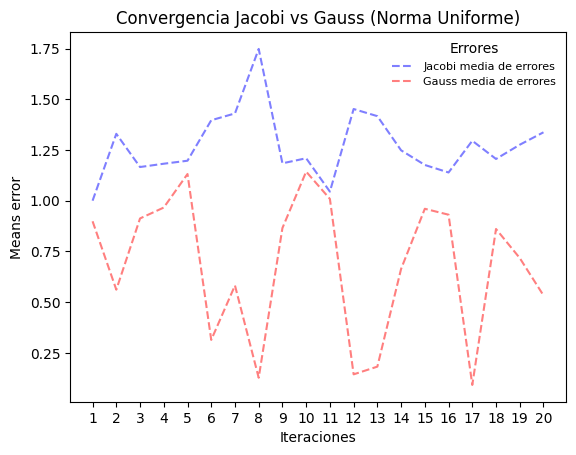

In [59]:
plt.plot(mean_errors1_jac, '--', label='Jacobi media de errores', alpha=0.5, color='blue')
plt.plot(mean_errors1_gauss, '--', label='Gauss media de errores', alpha=0.5, color='red')

plt.xticks(range(len(mean_errors1_gauss)), range(1, len(mean_errors1_gauss) + 1))
plt.title('Convergencia Jacobi vs Gauss (Norma Uniforme)')
plt.xlabel('Iteraciones')
plt.ylabel('Means error')
plt.legend(frameon=False, title='Errores', fontsize=8)

In [60]:
mean_errors2_jac = []
mean_errors2_gauss = []
v_0 = np.array([0, 0, 0, 0])

for i in range(20):
    Ax_b = gen_Ax_b(m=4, n=5, low=0, high=1)

    T, c = transformar_sistema(Ax_b[:, :-1], Ax_b[:, -1])

    table_vk, error2_jac = met_jacobi(T, c, v_0, tol=10 ** (-i), n_iteration=20, norm=2)
    table_xk, error2_gauss = metodo_gauss(T, c, v_0, tol=10 ** (-i), n_iteration=20, norm=2)

    mean_errors2_jac.append(np.mean(error2_jac))
    mean_errors2_gauss.append(np.mean(error2_gauss))

print(f'Media de los errores usando Jacobi con norma uniforme:\n {mean_errors2_jac}')
print(f'Media de los errores usando Gauss-Seidel con norma uniforme:\n {mean_errors2_gauss}')

Media de los errores usando Jacobi con norma uniforme:
 [1.0, 1.0531785331266208, 1.248565608285186, 1.1043448037018293, 1.1082473306997487, 1.2305124775523137, 1.073802830814326, 1.2553906630242324, 1.3164161876496503, 1.2574551916009036, 1.3240165387370453, 1.122250792948486, 1.380445437882658, 1.259764941372286, 1.1849911934262085, 1.3161868026023054, 1.0276022964876201, 1.4243313798212314, 1.3610200995672694, 1.1278315333416304]
Media de los errores usando Gauss-Seidel con norma uniforme:
 [0.8213029860721708, 1.0014832510527378, 0.8802916756462972, 0.9870191385626523, 0.936734889670003, 0.7040554169019707, 1.0273542191035756, 0.6885877327570741, 0.7002491876954802, 0.8519685140976841, 0.7051054183122825, 1.029337734230148, 0.14205229746036532, 0.6547802866062274, 0.9154942702911327, 0.6371482286261418, 0.9991804512468423, 0.3768710960315833, 0.6689286794609381, 1.2124239082426371]


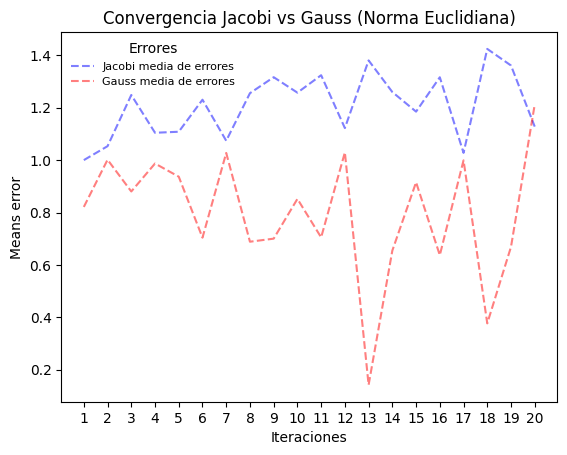

In [61]:
plt.plot(mean_errors2_jac, '--', label='Jacobi media de errores', alpha=0.5, color='blue')
plt.plot(mean_errors2_gauss, '--', label='Gauss media de errores', alpha=0.5, color='red')

plt.xticks(range(len(mean_errors2_gauss)), range(1, len(mean_errors2_gauss) + 1))
plt.title('Convergencia Jacobi vs Gauss (Norma Euclidiana)')
plt.xlabel('Iteraciones')
plt.ylabel('Means error')
plt.legend(frameon=False, title='Errores', fontsize=8)